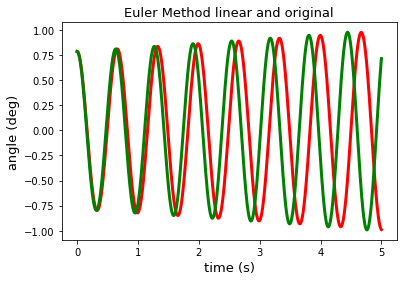

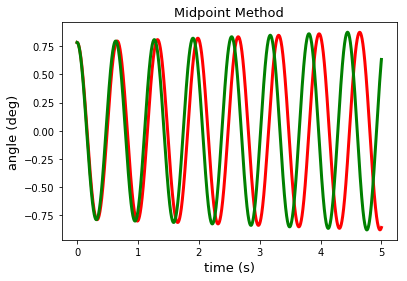

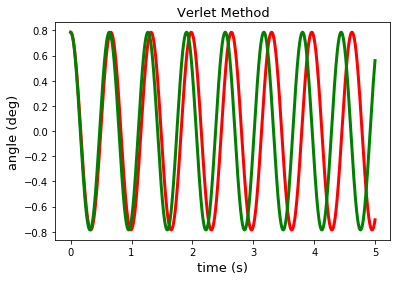

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math
class ODESolver:
    def __init__(self, omega_0, u_0, eta, n_iter):
        self.omega_0 = omega_0 #начальная скорость
        self.u_0 = u_0 #начальный угол отклонения маятника
        self.eta = eta #размер шага по времени
        self.n_iter = n_iter #число шагов
        
    def euler(self,alpha):
        #alpha=u''=-sin(u)*g/L, ускорение
        #beta=u''=-u*g/L, ускорение
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.u_ = np.zeros(self.n_iter)
        self.u_[0] = self.u_0
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.u_[i])
            self.u_[i+1] = self.u_[i] + self.eta*self.omega_[i]
        return self
    
    def midpoint(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.u_ = np.zeros(self.n_iter)
        self.u_[0] = self.u_0
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.u_[i])
            self.u_[i+1] = self.u_[i] + 0.5*self.eta*(self.omega_[i]+self.omega_[i+1])
        return self
    
    def verlet(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.time_[1]= self.eta
        self.u_ = np.zeros(self.n_iter)
        self.u_[0] = self.u_0
        self.u_[1] = self.u_[0]+self.omega_0*self.eta +0.5* (self.eta**2)*alpha(self.u_[0])
        for i in range(self.n_iter-2):
            self.time_[i+2] = self.time_[i+1] + self.eta
            self.u_[i+2] = 2*self.u_[i+1] - self.u_[i] + (self.eta**2)*alpha(self.u_[i+1])
        return self
def alpha(x):
        return -98*np.sin(x)
def beta(x):
        return -98*x

#Метод Эйлера

ETA=0.001 #\eta
STEPS=5000 #N


time=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).euler(alpha).time_
v=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).euler(beta).u_
u=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).euler(alpha).u_
plt.plot(time,u,lw=3,color='r')
plt.plot(time,v,lw=3,color='g')
plt.xlabel('time (s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method linear and original',size=13)
plt.show()

#Метод средней точки
time=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).midpoint(alpha).time_
u=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).midpoint(alpha).u_
v=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).midpoint(beta).u_
plt.plot(time,u,lw=3,color='r')
plt.plot(time,v,lw=3,color='g')
plt.xlabel('time (s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Midpoint Method',size=13)
plt.show()

#Метод Верле
time=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).verlet(alpha).time_
u=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).verlet(alpha).u_
v=ODESolver(omega_0 = 0, u_0 = math.pi/4, eta=ETA, n_iter=STEPS).verlet(beta).u_
plt.plot(time,u,lw=3,color='r')
plt.plot(time,v,lw=3,color='g')
plt.xlabel('time (s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Verlet Method',size=13)
plt.show()